In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,NaN,NaN,NaN,NaN,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,NaN,14.14,NaN,2.88,72.61,0.08,NaN,NaN,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	15
float64		column 3	5
float64		column 4	21
float64		column 5	26
float64		column 6	25
float64		column 7	41
float64		column 8	36
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,199.000000,199.000000,209.000000,193.000000,188.000000,189.000000,173.000000,178.000000,214.000000
mean,1.518353,13.384322,2.697943,1.424041,72.686011,0.493386,8.926301,0.138539,0.057009
std,0.002962,0.810405,1.431673,0.495017,0.735482,0.668905,1.360398,0.467467,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.790000,0.000000,0.000000
25%,1.516550,12.885000,2.190000,1.180000,72.327500,0.120000,8.220000,0.000000,0.000000
50%,1.517680,13.270000,3.480000,1.350000,72.800000,0.550000,8.580000,0.000000,0.000000
75%,1.519130,13.765000,3.600000,1.610000,73.100000,0.610000,9.080000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,14.960000,3.150000,0.510000


<AxesSubplot:>

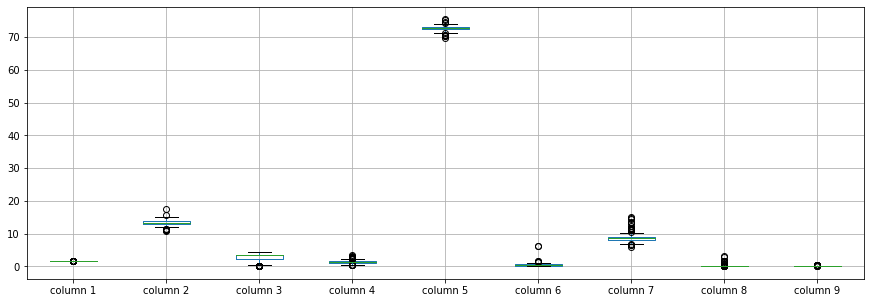

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518353
column 2    13.384322
column 3     2.697943
column 4     1.424041
column 5    72.686011
column 6     0.493386
column 7     8.926301
column 8     0.138539
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.200491,-0.180045,-0.358872,-0.501044,-0.281295,0.809475,0.138576,0.127383
column 2,-0.200491,1.000000,-0.235577,0.085021,-0.054357,-0.227009,-0.319132,0.240656,-0.241228
column 3,-0.180045,-0.235577,1.000000,-0.410739,-0.174293,-0.012478,-0.480036,-0.462763,0.070517
column 4,-0.358872,0.085021,-0.410739,1.000000,-0.016509,0.406196,-0.256394,0.377481,-0.061890
column 5,-0.501044,-0.054357,-0.174293,-0.016509,1.000000,-0.280468,-0.162851,-0.135489,-0.104846
column 6,-0.281295,-0.227009,-0.012478,0.406196,-0.280468,1.000000,-0.306340,-0.042144,-0.001831
column 7,0.809475,-0.319132,-0.480036,-0.256394,-0.162851,-0.306340,1.000000,-0.029443,0.095967
column 8,0.138576,0.240656,-0.462763,0.377481,-0.135489,-0.042144,-0.029443,1.000000,-0.016874
column 9,0.127383,-0.241228,0.070517,-0.061890,-0.104846,-0.001831,0.095967,-0.016874,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+24,9+24+24,9+24+24+24,9+24+24+24+24,9+24+24+24+24+24,9+24+24+24+24+24+24,9+24+24+24+24+24,9+24+24+24+24,9+24+24+24,9+24+24,9+24,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 90.04434790978065
Epoch: 1 , loss: 90.5079844548152
Epoch: 2 , loss: 90.45053335336539
Epoch: 3 , loss: 90.42329993614784
Epoch: 4 , loss: 90.87003502478966
Epoch: 5 , loss: 90.81470665564903
Epoch: 6 , loss: 89.97704608623798
Epoch: 7 , loss: 90.03364973801833
Epoch: 8 , loss: 90.02423447829027
Epoch: 9 , loss: 90.18575815054086
Epoch: 10 , loss: 90.28844334528996
Epoch: 11 , loss: 89.95746495173528
Epoch: 12 , loss: 90.88301027738132
Epoch: 13 , loss: 90.50634002685547
Epoch: 14 , loss: 90.32711498553937
Epoch: 15 , loss: 90.86202650803786
Epoch: 16 , loss: 90.44198960524339
Epoch: 17 , loss: 90.41201958289513
Epoch: 18 , loss: 89.96765488844652
Epoch: 19 , loss: 90.30218388484074
Epoch: 20 , loss: 90.46562077448918
Epoch: 21 , loss: 89.97310697115384
Epoch: 22 , loss: 90.36421614426833
Epoch: 23 , loss: 90.32007246751051
Epoch: 24 , loss: 90.32181255634015
Epoch: 25 , loss: 89.9203849205604
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,-29.834099,0.060977,5.630720,0.034173,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.556195,0.000000,3.763986,0.0,0.000000,0.000000,3.283636,-1.023299,0.0
210,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
211,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
212,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(276.4277671152631, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2535020595270745

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.640000,4.490000,1.10,71.780000,0.060000,8.750000,0.000000,0.0
1,1.517610,13.890000,3.600000,1.36,42.895901,0.540977,13.460720,0.034173,0.0
2,1.516180,13.530000,3.550000,1.54,72.990000,0.390000,7.780000,0.000000,0.0
3,1.517660,13.210000,3.690000,1.29,72.610000,0.570000,8.220000,0.000000,0.0
4,1.517420,13.270000,3.620000,1.24,73.080000,0.550000,8.070000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,2.072425,14.140000,3.763986,2.88,72.610000,0.080000,12.463636,0.036701,0.0
210,1.516850,14.920000,0.000000,1.99,73.060000,0.000000,8.400000,1.590000,0.0
211,1.520650,14.360000,0.000000,2.02,73.420000,0.000000,8.440000,1.640000,0.0
212,1.516510,14.380000,0.000000,1.94,73.610000,0.000000,8.480000,1.570000,0.0


In [20]:
imputations[-1].to_excel("Glass_AG_10(imp).xlsx", index=False, header=False)